In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Import Sample Data

In [6]:
import pickle
file = open('./Data/Sample_Dataset','rb')
data_sample = pickle.load(file)
file.close()

### Import Test Sample

In [4]:
import pickle
file = open('./Data/Flight_2020_Test_sample','rb')
test_sample = pickle.load(file)
file.close()

FileNotFoundError: [Errno 2] No such file or directory: './Data/Flight_2020_Test_sample'

In [78]:
common_features = test_sample.columns.intersection(data_sample.columns)

In [50]:
# Select Features from columns that simulate Test Sample.
# Exclude Features where the future data is unavailable

features = ['mkt_carrier_fl_num',
                   'op_carrier_fl_num', 'origin_airport_id',
                   'dest_airport_id', 'crs_dep_time', 'dep_time',
                   'wheels_off', 'wheels_on', 'crs_arr_time', 'crs_elapsed_time', 
                   'air_time', 
                   'distance', 'is_delayed',
                   'flight_speed', 'flight_haul_type', 'flight_month',
                   'arrival_hour_of_day', 'departure_hour_of_day',
                   'avg_flights', 'avg_passengers', 'avg_fuel',
                   'total_distance','total_passengers',  
                   'avgCloud', 'avgDryDays','avgRainDays', 'avgSnowDays', 'avgThunderDays', 
                   'early_count', 'delay_count']

target = ['arr_delay']

## Train Model on Sample Data PCA Regression

### Split Sample Data

In [5]:
# Train 80%, Test 20% Shuffled
train_x, test_x, y_train,y_test = train_test_split(data_sample[features], test_size=0.2, random_state=42, shuffle=True)

### PCA Breakdown

In [6]:
# Standardize training data
train_std = StandardScaler().fit_transform(train_x)
test_std = StandardScaler().transform(test_x)

In [8]:
# # Create Covariance Matrix
# mean_vec = np.mean(train_std, axis=0)
# cov_mat = (train_std - mean_vec).T.dot((train_std - mean_vec)) / (train_std.shape[0]-1)
# #print('Covariance matrix \n%s' %cov_mat)

# mean_vec_test = np.mean(test_std, axis=0)
# cov_mat_test = (test_std - mean_vec_test).T.dot((test_std - mean_vec_test)) / (test_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)

In [7]:
# EigenDecomposition
# cov_mat = np.cov(train_std.T)
# eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [9]:
# Order Eigenvalues in Descending Order to view relevant variances
# eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# print('Eigenvalues in descending order:')
# for i in eig_pairs:
#    print(i[0])

### Select Principle Components

Number of Components: 10
Total Explained Variance: 83.16642131758279


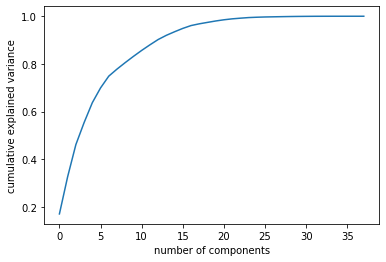

In [60]:
# View Variance ratio as based on highest EigenValues
pca = PCA(n_components=10)
principal_components = pca.fit_transform(train_std)
principal_components_test = pca.transform(test_std)

print(f'Number of Components: {len(pca.components_)}')
print('Total Explained Variance:', pca.explained_variance_ratio_.sum()*100)

pca = PCA().fit(train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(principal_components,y_train)
print('Regressor Score:', regressor.score(principal_components_test,y_test))
# print('Coefficients:','\n',regressor.coef_,'\n')
# print('Component Shape:', principal_components_test.shape)
# print('Target Shape:', y_test.shape)



Coefficients: 
 [[-0.52158638 -2.27269832 -0.65279621  0.74967257  1.4462676  -0.88902411
   0.77056137  0.10299616 16.47135219 -3.49295359]] 

Component Shape: (289360, 10)
Target Shape: (289360, 1)
Regressor Score: 0.13634048980200875


#### R_Score:

The higher the r-squared, the better the model fits your data (there is a caveat to this…) because there is a possibility of having a low r-squared value for a good model and vice-versa


R-squared is a relative measure of model fit.
This means they are not a good measure to determine how well a model fits the data.

#### RMSE (Root-Mean-Squared-Error)

The lower the RMSE the better the measure of fit. This means that there is little variation in the spread of data

In [ ]:
# RMSE Evaluation

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, pred_y))
print(rmse)

### Predict Values

In [48]:
pred_y = regressor.predict(principal_components_test)
pred_y

In [53]:
pred_y

array([[ 39.69120921],
       [ -1.11584198],
       [ 19.42519648],
       ...,
       [ 24.17420588],
       [-16.00149283],
       [-19.09784342]])

In [80]:
import gc
collected = gc.collect()
print("Garbage collector: collected", 
          "%d objects." % collected) 

Garbage collector: collected 5531 objects.
